Introduction
====

This kernal is originally from https://github.com/nltk/nltk/blob/develop/nltk/test/gensim.doctest

We demonstrate three functions:

- Train the word embeddings using brown corpus;
- Load the pre-trained model and perform simple tasks; and
- Pruning the pre-trained binary model.

In [1]:
import gensim

Using TensorFlow backend.


Train the model
====

Here we train a word embedding using the Brown Corpus:

In [2]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

It might take some time to train the model. So, after it is trained, it can be saved as follows:

In [3]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

The model will be the list of words with their embedding. We can easily get the vector representation of a word.

In [4]:
len(new_model['university'])

100

There are some supporting functions already implemented in Gensim to manipulate with word embeddings.
For example, to compute the cosine similarity between 2 words:

In [5]:
new_model.similarity('university','school') > 0.3

True

Using the pre-trained model
====


NLTK includes a pre-trained model which is part of a model that is trained on 100 billion words from the Google News Dataset.
The full model is from https://code.google.com/p/word2vec/ (about 3 GB).

In [6]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

We pruned the model to only include the most common words (~44k words).

In [7]:
len(model.vocab)

43981

Each word is represented in the space of 300 dimensions:

In [8]:
len(model['university'])

300

Finding the top n words that are similar to a target word is simple. The result is the list of n words with the score.


In [9]:
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918886184692),
 ('faculty', 0.6780906915664673),
 ('undergraduate', 0.6587096452713013)]


Finding a word that is not in a list is also supported, although, implementing this by yourself is simple.

In [10]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

Mikolov et al. (2013) figured out that word embedding captures much of syntactic and semantic regularities. For example,
the vector 'King - Man + Woman' is close to 'Queen' and 'Germany - Berlin + Paris' is close to 'France'.

In [11]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118192911148071)]

In [12]:
model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884092330932617)]

We can visualize the word embeddings using t-SNE (http://lvdmaaten.github.io/tsne/). For this demonstration, we visualize the first 50 words.



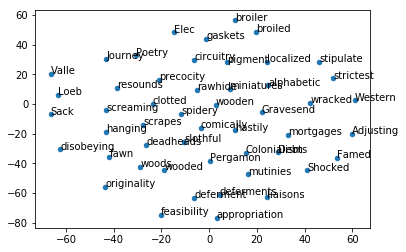

In [13]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['university'])))

for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()

Prune the trained binary model
====

Here is the supporting code to extract part of the binary model (GoogleNews-vectors-negative300.bin.gz) from https://code.google.com/p/word2vec/

We use this code to get the `word2vec_sample` model.

In [14]:
import gensim
from gensim.models.word2vec import Word2Vec
# Load the binary model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True);

# Only output word that appear in the Brown corpus
from nltk.corpus import brown
words = set(brown.words())
print (len(words))

# Output presented word to a temporary file
out_file = 'pruned.word2vec.txt'
f = open(out_file,'wb')

word_presented = words.intersection(model.vocab.keys())
f.write('{} {}\n'.format(len(word_presented),len(model['word'])))

for word in word_presented:
    f.write('{} {}\n'.format(word, ' '.join(str(value) for value in model[word])))

f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin.gz'